# ECG Heartbeat Classification

In [1]:
import os

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from utils import get_model, helpers
from experiments import run_mitbih, run_ptbdl

GPU available:False


Using TensorFlow backend.


In [2]:
# Make directory
model_directory = "./models"
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

### MITBIH Dataset

#### Data Exploration

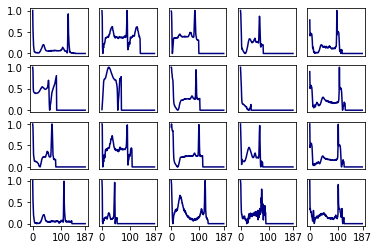

/home/nik/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


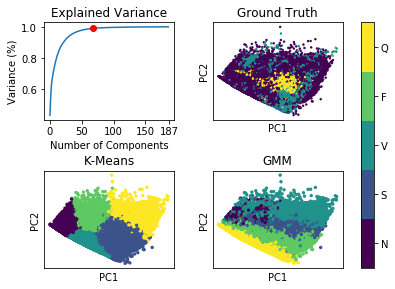

In [3]:
%run ./data_exploration/data_exploration_mibih.ipynb


#### Neural Network Experiments

In [4]:
models = [
    "rnn_lstm",
    "rnn_gru",
    "rnn_gru_bidir",
    "rnn_lstm_bidir",
]

In [5]:
df_train = pd.read_csv("../data/ECG_Heartbeat_Classification/heartbeat/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("../data/ECG_Heartbeat_Classification/heartbeat/mitbih_test.csv", header=None)

Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]
Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

In [ ]:
if "rnn_lstm" in models:
    run_mitbih.run_lstm(model_directory, X, Y, X_test, Y_test)
if "rnn_gru" in models:
    run_mitbih.run_gru(model_directory, X, Y, X_test, Y_test)
if "rnn_lstm_bidir" in models:
    run_mitbih.run_lstm_bidir(model_directory, X, Y, X_test, Y_test)
if "rnn_gru_bidir" in models:
    run_mitbih.run_gru_bidir(model_directory, X, Y, X_test, Y_test)

### PTBDB Dataset

#### Data Exploration

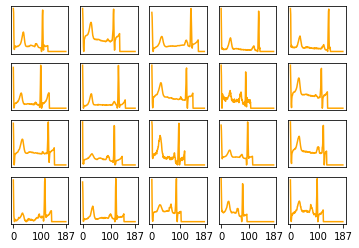

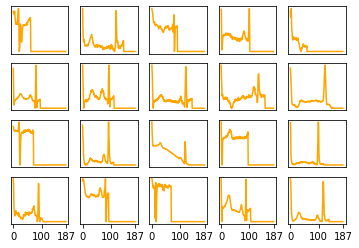

/home/nik/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


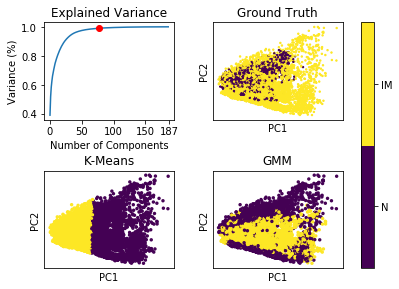

In [6]:
%run ./data_exploration/data_exploration_ptbdb.ipynb

#### Neural Network Experiments

In [ ]:
models = [
    "rnn_lstm",
    "rnn_gru",
    "rnn_gru_bidir",
    "rnn_lstm_bidir",
    "rnn_transferlearning",
]

In [ ]:
df_1 = pd.read_csv("../data/ECG_Heartbeat_Classification/ptbdb_normal.csv", header=None)
df_2 = pd.read_csv("../data/ECG_Heartbeat_Classification/ptbdb_abnormal.csv", header=None)
df = pd.concat([df_1, df_2])
df_train, df_test = train_test_split(
df, test_size=0.2, random_state=1337, stratify=df[187]
)

Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]
Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

In [ ]:
if "rnn_lstm" in models:
    run_ptbdl.run_lstm(model_directory, X, Y, X_test, Y_test)
if "rnn_gru" in models:
    run_ptbdl.run_gru(model_directory, X, Y, X_test, Y_test)
if "rnn_lstm_bidir" in models:
    run_ptbdl.run_lstm_bidir(model_directory, X, Y, X_test, Y_test)
if "rnn_gru_bidir" in models:
    run_ptbdl.run_gru_bidir(model_directory, X, Y, X_test, Y_test)
if "rnn_transferlearning" in models:
    base_model = get_model.rnn_gru_bidir(
        nclass=5, dense_layers=[64, 16, 8], binary=False
    )
    file_name = "mitbih_rnn_gru_bidir"
    file_path = os.path.join(model_directory, file_name + ".h5")
    base_model.load_weights(file_path)

    run_ptbdl.run_transfer_learning(base_model, model_directory, X, Y, X_test, Y_test)
        